In [1]:
import pandas as pd
import os
import csv 
import requests 
#import xml.etree.ElementTree as ET 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
import plotly.plotly as py
import plotly.tools as tls
from matplotlib.dates import date2num
import datetime


In [88]:
#!unzip 'Performance_XML_Data.zip' -d  $PUIDATA

In [4]:
!curl -O 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_181103.txt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.9M    0 24.9M    0     0  2596k      0 --:--:--  0:00:09 --:--:-- 2545k


In [2]:
turn= pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_181103.txt')

In [3]:
turn.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,00:00:00,REGULAR,6811988,2309879
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,04:00:00,REGULAR,6812018,2309884
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,08:00:00,REGULAR,6812047,2309925
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,12:00:00,REGULAR,6812143,2309997
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/27/2018,16:00:00,REGULAR,6812374,2310050


In [4]:
turn.shape

(199613, 11)

In [5]:
turn.DATE.unique()

array(['10/27/2018', '10/28/2018', '10/29/2018', '10/30/2018',
       '10/31/2018', '11/01/2018', '11/02/2018'], dtype=object)

In [6]:
turn['EXITS'] = turn['EXITS                                                               ']

In [7]:
turn['DATE'] = pd.to_datetime(turn['DATE'])
turn['day_of_week'] = turn['DATE'].dt.day_name()

In [120]:
#turn1=turn1.groupby('SCP')['ENTRIES','EXITS'].sum()

In [8]:
turn.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,EXITS,day_of_week
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-10-27,00:00:00,REGULAR,6811988,2309879,2309879,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-10-27,04:00:00,REGULAR,6812018,2309884,2309884,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-10-27,08:00:00,REGULAR,6812047,2309925,2309925,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-10-27,12:00:00,REGULAR,6812143,2309997,2309997,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-10-27,16:00:00,REGULAR,6812374,2310050,2310050,Saturday


In [9]:
turnA = turn[turn['STATION'].str.contains('ASTORIA BLVD')]

In [10]:
turnA.STATION.unique()

array(['ASTORIA BLVD'], dtype=object)

In [11]:
turnA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'EXITS', 'day_of_week'],
      dtype='object')

In [12]:
turnB = turnA[['SCP','day_of_week','DATE','TIME','ENTRIES','EXITS']]
turnB.head()

,SCP,day_of_week,DATE,TIME,ENTRIES,EXITS
178904,00-00-00,Saturday,2018-10-27,00:00:00,6344228,11844607
178905,00-00-00,Saturday,2018-10-27,04:00:00,6344240,11844811
178906,00-00-00,Saturday,2018-10-27,08:00:00,6344314,11844902
178907,00-00-00,Saturday,2018-10-27,12:00:00,6344519,11845087
178908,00-00-00,Saturday,2018-10-27,16:00:00,6344655,11845428


In [13]:
turnB.SCP.unique()

array(['00-00-00', '00-00-01', '00-00-02', '00-00-03', '00-03-00',
       '00-05-00', '00-05-01'], dtype=object)

In [14]:
turnB['day&time']=turnB["day_of_week"].map(str) + ' ' + turnB["TIME"]

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [15]:
turnB.head()

,SCP,day_of_week,DATE,TIME,ENTRIES,EXITS,day&time
178904,00-00-00,Saturday,2018-10-27,00:00:00,6344228,11844607,Saturday 00:00:00
178905,00-00-00,Saturday,2018-10-27,04:00:00,6344240,11844811,Saturday 04:00:00
178906,00-00-00,Saturday,2018-10-27,08:00:00,6344314,11844902,Saturday 08:00:00
178907,00-00-00,Saturday,2018-10-27,12:00:00,6344519,11845087,Saturday 12:00:00
178908,00-00-00,Saturday,2018-10-27,16:00:00,6344655,11845428,Saturday 16:00:00


In [93]:
#turnB["ENTRIES"] = pd.to_numeric(turnB["ENTRIES"])
#turnB['EXITS'] = pd.to_numeric(turnB['EXITS                                                               '])

In [16]:
turnC =  turnB[turnB['day_of_week'].str.contains('Monday')]

In [17]:
#turnC['ENTRIES'] = (turnC['ENTRIES'] - turnC['ENTRIES'].mean()) / turnC['ENTRIES'].std()

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
#turnC['EXITS'] = (turnC['EXITS'] - turnC['EXITS'].mean()) / turnC['EXITS'].std()

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [17]:
turnC['TIME'] = pd.to_datetime(turn['TIME'])

turnC['hour'] = turnC.TIME.dt.hour


/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
turn1=turnC.groupby('hour')['ENTRIES','EXITS'].sum()

In [103]:
#turnD=turnC.groupby('hour')['ENTRIES','EXITS'].mean()

In [19]:
turn1

,ENTRIES,EXITS
hour,,
0,58071453,31578814
4,58071537,31579121
8,174224458,94738778
12,58079980,31580309
16,58081917,31581610
20,58083582,31586117


In [148]:
#turn1['ENTRIES'] = (turn1['ENTRIES'] - turn1['ENTRIES'].mean()) / turn1['ENTRIES'].std()
#turn1['EXITS'] = (turn1['EXITS'] - turn1['EXITS'].mean()) / turn1['EXITS'].std()

In [20]:
turn1['ENTRIES'] = turn1['ENTRIES'] / 1000000
turn1['EXITS'] = turn1['EXITS'] / 1000000

In [41]:
turn1.rename(index={0:'8pm-12am', 4:'12am-4am', 8 : '4am-8am', 12: '8am-12pm', 16:'12pm-4pm', 20: '4pm-8am'},inplace=True)

In [42]:
turn1.head()

,ENTRIES,EXITS
hour,,
8pm-12am,58.071453,31.578814
12am-4am,58.071537,31.579121
4am-8am,174.224458,94.738778
8am-12pm,58.079980,31.580309
12pm-4pm,58.081917,31.581610


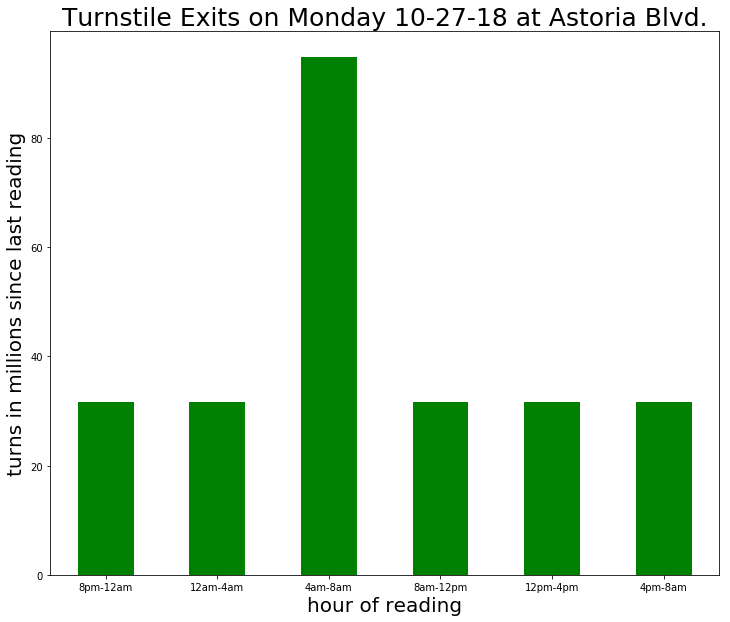

In [43]:


#turn1.plot.bar(figsize=(12, 10), y='ENTRIES', label="Entries", color='b')
turn1.plot.bar(figsize=(12, 10),y='EXITS', label="Exits", color='g', legend=False)

plt.xlabel('hour of reading', fontsize=20)
plt.ylabel('turns in millions since last reading', fontsize=20)

plt.xticks(rotation='horizontal')

plt.title('Turnstile Exits on Monday 10-27-18 at Astoria Blvd.', fontsize=25)

plt.show()


## I've edited this to reflect Cyrus's suggestion to 1) remove legend; 2) rotate x-ticks' 3) include date in title; 4) make the x labels into bins so that it is clear that the measurement is for 4 hours; I also increased font sizes. 